# Settings

In [278]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [279]:
train_url = 'https://raw.githubusercontent.com/cchinchia/Titanic-Challenge/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/cchinchia/Titanic-Challenge/main/data/test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [280]:
# test_df.info()
# train_df.info()
train_des = train_df.describe()

In [281]:
# missing data
total = train_df.isnull().sum().sort_values(ascending=False)
# print(total)
percent = (train_df.isnull().sum() / train_df.isnull().count() * 100).sort_values(ascending=False).head(5)
# print(percent)

# Analyze

In [282]:
# pd.set_option('display.max_columns', None)
print(train_df.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [283]:
# gender survival stacked bar 
survived_female = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].index)
survived_male = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].index)

non_survived_female = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')].index)
non_survived_male = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')].index)


survived = [survived_female, survived_male]
died = [non_survived_female, non_survived_male]

# plt.bar(['female', 'male'], survived, color='g')
# plt.bar(['female', 'male'], died, color='r', bottom=survived)
# plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

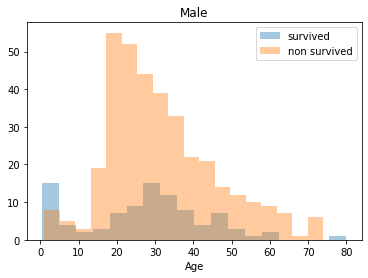

In [284]:
# male survival
plt1 = sns.distplot(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].Age.dropna(), label = 'survived', bins=18, kde = False)
plt1 = sns.distplot(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')].Age.dropna(), label = 'non survived', bins=18, kde = False)
plt1.legend()
plt1.set_title('Male')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

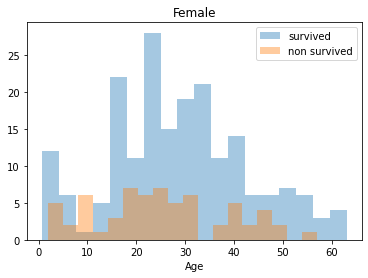

In [285]:
# female survival
plt2 = sns.distplot(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].Age.dropna(), label = 'survived', bins=18, kde = False)
plt2 = sns.distplot(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')].Age.dropna(), label = 'non survived', bins=18, kde = False)
plt2.legend()
plt2.set_title('Female')

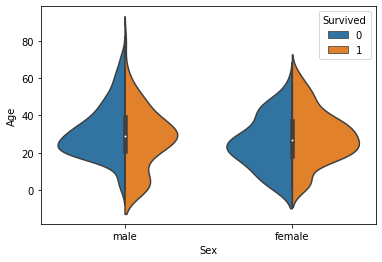

In [286]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True)

No handles with labels found to put in legend.


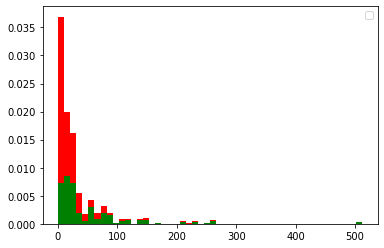

In [287]:
# survival by ticket fare
plt.figure()

plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], bins=50, color=['g', 'r'] ,stacked=True, density=True)
plt.legend()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


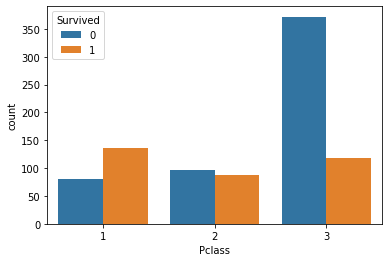

In [288]:
# survival by class
sns.countplot(train_df['Pclass'], hue=train_df['Survived'])

# Feature Engineering

In [289]:
# combined dataframe
combined_df = train_df.append(test_df)
combined_df.drop(labels=['Survived', 'PassengerId'], axis=1)
print(combined_df.shape)
print(train_df.shape)

(1309, 12)
(891, 12)


In [290]:
# process title
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined_df['Title'] = combined_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined_df['Title'] = combined_df.Title.map(Title_Dictionary)
    # status('Title')
    return combined_df

In [291]:
combined_df = get_titles()
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [292]:
combined_df[combined_df['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [293]:
# Process age
grouped_train = combined_df.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [294]:
def fill_age(row):
  condition = (
      (grouped_median_train['Sex'] == row['Sex']) &
      (grouped_median_train['Title'] == row['Title']) &
      (grouped_median_train['Pclass'] == row['Pclass'])
  )
  return grouped_median_train[condition]['Age'].values[0]

def process_age():
  global combined_df
  combined_df['Age'] = combined_df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
  return combined_df

combined_df = process_age()

In [295]:
# Process name & title
def process_names():
  global combined_df
  combined_df.drop('Name', axis=1, inplace=True)

  titles_dummies = pd.get_dummies(combined_df['Title'], prefix='Title')
  combined_df = pd.concat([combined_df, titles_dummies], axis=1)

  combined_df.drop('Title', axis=1, inplace=True)
  return combined_df

combined_df = process_names()
combined_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [296]:
# transfer sex string to integer
def process_sex():
  global combined_df
  combined_df['Sex_Code'] = combined_df['Sex'].map({'female': 1, 'male': 0}).astype('int')
  return combined_df

combined_df = process_sex()
print(combined_df.head(5))

   PassengerId  Survived  Pclass  ... Title_Officer  Title_Royalty  Sex_Code
0            1       0.0       3  ...             0              0         0
1            2       1.0       1  ...             0              0         1
2            3       1.0       3  ...             0              0         1
3            4       1.0       1  ...             0              0         1
4            5       0.0       3  ...             0              0         0

[5 rows x 18 columns]


In [297]:
def process_embarked():
  global combined_df
  # fill embarked na with S
  combined_df['Embarked'] = combined_df['Embarked'].fillna('S')

  # replace categorical values with dummy variables
  embarked_dummies = pd.get_dummies(combined_df['Embarked'], prefix='Embarked')
  combined_df = pd.concat([combined_df, embarked_dummies], axis=1)
  return combined_df

combined_df = process_embarked()

In [298]:
def process_fare():
  global combined_df
  # fill 1 missing fare with mean
  combined_df['Fare'] = combined_df['Fare'].fillna(train_df['Fare'].mean())
  return combined_df

combined_df = process_fare()

In [299]:
combined_df_head = combined_df.head(5)

print(combined_df.columns.tolist())
# print(train_df.describe())
# print(test_df.describe())
# print(combined_df.describe())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Sex_Code', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [300]:
# missing values
def missing_values(column_name):
  global combined_df
  return combined_df[column_name].isnull().sum()

print(missing_values('Age'))
print(missing_values('Pclass'))
print(missing_values('SibSp'))
print(missing_values('Parch'))
print(missing_values('Fare'))
print(missing_values('Sex_Code'))

0
0
0
0
0
0


In [301]:
# not yet: ticket, family size, cabin

# Model Training

In [302]:
# extract training set from combined dataframe
x = combined_df[:891].drop(labels=['Survived', 'PassengerId', 'Sex'], axis=1)
y = combined_df[:891]['Survived']
# x.describe()

In [303]:
x_test = combined_df[891::].drop(labels=['Survived', 'PassengerId', 'Sex'], axis=1)
y_test = combined_df[891::]['Survived']
# x_test.describe()

In [304]:
# Algorithms
# used
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
# non-used
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# hyper-parameter
from sklearn.model_selection import GridSearchCV

# data split
from sklearn.model_selection import train_test_split
# val
from sklearn.model_selection import cross_val_score
Base = ['Sex_Code', 'Pclass', 'Embarked_S', 'Embarked_Q', 'Fare', 'Parch', 'SibSp', 'Age']

In [305]:
def compute_score(clf, x, y, scoring='accuracy'):
    xval = cross_val_score(clf, x, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [306]:
# split training & validation data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 42)
# x_train.describe()

In [307]:
random_forest = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
decision_tree = DecisionTreeClassifier(random_state=2)
knn = KNeighborsClassifier()
perceptron = Perceptron(random_state=2)
log_reg = LogisticRegression(random_state=2, max_iter=200)

models = [random_forest, decision_tree, knn, perceptron, log_reg]

for model in models:
  print('Cross-validation of : {0}'.format(model.__class__))
  score = compute_score(clf=model, x=x[Base], y=y, scoring='accuracy')
  print('CV score = {0}'.format(score))
  print('****')

Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8148389931579938
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.767698198480949
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 0.682417927311531
****
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
CV score = 0.6981859268093654
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8002573598644153
****


In [308]:
# find the best hyper-parameter for decision tree
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
decision_tree = DecisionTreeClassifier(random_state=2)
tree_search = GridSearchCV(decision_tree, param_grid)

tree_search.fit(x[Base],y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')
Tree best score : 0.8091833532107213


In [309]:
# find the best hyper-parameter for random forest
param_grid = {'n_estimators':np.arange(50,250,50),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'min_samples_split':np.arange(2,26,4),
              'criterion':['gini','entropy']}
random_forest = RandomForestClassifier(random_state=2)
forest_search = GridSearchCV(random_forest, param_grid)

forest_search.fit(x[Base],y)

print("forest best parameters :",forest_search.best_params_)
print("forest best estimator :",forest_search.best_estimator_ )
print("forest best score :",forest_search.best_score_ )

forest best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50}
forest best estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
forest best score : 0.8327851358985624


In [310]:
# feature plot
random_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
random_forest = random_forest.fit(x[Base], y)

features = pd.DataFrame()
features['feature'] = x[Base].columns
features['importance'] = random_forest.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

# features.plot(kind='barh', figsize=(25, 25))

# User Interface Function

In [311]:
class Model:

  def fit(x, y):
    pass

  def compute_score(x, y, scoring):
    pass

class DecisionTreeModel(Model):

  def __init__(self, depth, split, leaf):
    self.decision_tree = DecisionTreeClassifier(random_state=2, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
  def fit(self, x, y):
    self.model = self.decision_tree.fit(x, y)

  def compute_score(self, x, y, scoring):
    xval = cross_val_score(self.decision_tree, x, y, cv = 5, scoring=scoring)
    print(np.mean(xval))


class RandomForestModel(Model):
  def __init__(self, depth, estimator, split):
    self.random_forest = RandomForestClassifier(random_state=2, max_depth=depth, n_estimators=estimator, min_samples_split=split, oob_score=True, criterion='gini')

  def fit(self, x, y):
    self.model = self.random_forest.fit(x, y)

  def compute_score(self, x, y, scoring):
    xval = cross_val_score(self.random_forest, x, y, cv = 5, scoring=scoring)
    print(np.mean(xval))

In [312]:
def set_up_decision_tree_model():
  param_choice = input("Use my default options for the decision tree? [y/n]\n")
  if (param_choice.lower().startswith("y")):
    print("My default options: max_depth: 3, min_samples_split: 20, min_samples_leaf: 20")
    return DecisionTreeModel(3, 20, 20)
  elif (param_choice.lower().startswith("n")):
    depth = input("What is the maximum depth of the tree (default=5)?\n")
    split = input("What is the minimum number of samples required to split an internal node (default=20)?\n")
    leaf = input("What is the minimum number of samples required to be at a leaf node (default=25)?\n")
    return DecisionTreeModel(int(depth), int(split), int(leaf))
  else:
    print(f"{param_choice} is an invalid choice.")
    return set_up_decision_tree_model()

def set_up_random_forest_model():
  param_choice = input("Use my default options for the random forest? [y/n]\n")
  if (param_choice.lower().startswith("y")):
    print("My default options: max_depth': 5, n_estimators: 50, min_samples_split: 6")
    return RandomForestModel(5, 50, 6)
  elif (param_choice.lower().startswith("n")):
    depth = input("What is the maximum depth of the tree (default=5)?\n")
    estimator = input("How many trees in the forest (default=100)?\n")
    split = input("What is the minimum number of samples required to split an internal node (default=6)?\n")
    return RandomForestModel(int(depth), int(estimator), int(split))
  else:
    print(f"{param_choice} is an invalid choice.")
    return set_up_random_forest_model()

model_options = {
    '1': set_up_decision_tree_model,
    '2': set_up_random_forest_model
}

def choose_model():
  choice = input("Choose a model: \n1. Decision tree\n2. Random Forest\n")
  model_func = model_options.get(choice)
  if (model_func == None):
    print(f"{choice} is an invalid choice!\n")
    return choose_model()
  return model_func()

def main_model():
  play = True
  while (play):
    model = choose_model()
    print('Computing cross-validation accuracy score...')
    model.fit(x[Base], y)
    model.compute_score(x[Base], y, 'accuracy')
    play = input("Try another model? [y/n] ").lower().startswith("y")
    print("")
  # print("Bye")


In [313]:
def main():
  exit = False
  print('This app walks you through how I build the machine learning model \nto make prediction for one of the most well-known challenges on Kaggle.')
  print('***')

  while exit == False:
    print('MAIN MENU')
    print('0. What is this challenge about?')
    print('1. Learn my process')
    print('2. Try your own model')
    print('3. Help')
    print('4. Exit')
    print('***')
    choice = input('What do you want to look at?\n')
    if choice == '0':
      print('[What is this challenge about?]')
      print('This challenge wants you to use machine learning to create a model \nthat predicts which passengers survived the Titanic shipwreck.')
      print('https://www.kaggle.com/c/titanic')
      print('')
      exit = input("Back to main menu? [y/n] ").lower().startswith("n")

    if choice == '1':
      print('[1st step: setting up]')
      print('I imported the dataset and had a glimpse of the dataset.\n')
      # print(train_des)
      # print('as well as its missing values:')
      # print(total)
      print('[2nd step: data analysis]')
      print('I visualized the data to investigate possible factors that affect survival rate.\n')
      # plt.bar(['female', 'male'], survived, color='g')
      # plt.bar(['female', 'male'], died, color='r', bottom=survived)
      # plt.show()
      # print('From this graph, we can tell gender might be a factor because female tends to survive than male.')
      print('[3rd step: feature engineering]')
      print('I did feature engineering to make the dataset prepared for model training,')
      print('and this includes filling missing values and converting strings into integers.\n')
      # print(combined_df_head)
      print('[4th step: model training]')
      print('I tried different models and optimized hyperparameters to find the best options to build my machine learning model.\n')

      exit = input("Back to main menu? [y/n] ").lower().startswith("n")

    if choice == '2':
      main_model()
      exit = input("Back to main menu? [y/n] ").lower().startswith("n")
    if choice == '3':
      print('help text\n')
      exit = input("Back to main menu? [y/n] ").lower().startswith("n")
    if choice == '4':
      exit = True
      break
  print('See you next time!')
main()

This app walks you through how I build the machine learning model 
to make prediction for one of the most well-known challenges on Kaggle.
***
MAIN MENU
0. What is this challenge about?
1. Learn my process
2. Try your own model
3. Help
4. Exit
***
What do you want to look at?
4
See you next time!


# Reference

https://medium.com/datadriveninvestor/start-with-kaggle-a-comprehensive-guide-to-solve-the-titanic-challenge-8ac5815b0473
https://www.kaggle.com/viczyf/titanic-random-forest-82-78